In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [46]:
import tensorflow as tf

from sklearn.metrics import mean_squared_error as MSE

tf.__version__

'2.1.0'

# The need for optimization

## Coding how weight changes affect accuracy

In [13]:
def relu(input):
    '''Define your relu activation function here'''
    # Calculate the value for the output of the relu function: output
    output = max(0, input)
    
    # Return the value just calculated
    return(output)

In [14]:
def predict_with_network(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input) 

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input) 

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer) 
    
    # Return model output
    return(model_output)

In [15]:
# The data point you will make a prediction for
input_data = np.array([0, 3])

# Sample weights
weights_0 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 1]
            }

# The actual target value, used to calculate the error
target_actual = 3

# Make prediction using original weights
model_output_0 = predict_with_network(input_data, weights_0)

# Calculate error: error_0
error_0 = model_output_0 - target_actual

# Create weights that cause the network to make perfect prediction (3): weights_1
weights_1 = {'node_0': [2, 1],
             'node_1': [1, 0],
             'output': [1, 1]
            }

# Make prediction using new weights: model_output_1
model_output_1 = predict_with_network(input_data, weights_1)

# Calculate error: error_1
error_1 = model_output_1 - target_actual

# Print error_0 and error_1
print(error_0)
print(error_1)

6
0


## Scaling up to multiple data points

In [16]:
input_data = [np.array([0, 3]),
              np.array([1, 2]),
              np.array([-1, -2]),
              np.array([4, 0])]
target_actuals = [1, 3, 5, 7]

weights_0 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 1]
            }

weights_1 = {'node_0': [2, 1],
             'node_1': [1, 1.5],
             'output': [1, 1.5]
            }

In [18]:
from sklearn.metrics import mean_squared_error

# Create model_output_0 
model_output_0 = []
# Create model_output_1
model_output_1 = []

# Loop over input_data
for row in input_data:
    # Append prediction to model_output_0
    model_output_0.append(predict_with_network(row, weights_0))
    
    # Append prediction to model_output_1
    model_output_1.append(predict_with_network(row, weights_1))

# Calculate the mean squared error for model_output_0: mse_0
mse_0 = mean_squared_error(model_output_0, target_actuals)

# Calculate the mean squared error for model_output_1: mse_1
mse_1 = mean_squared_error(model_output_1, target_actuals)

# Print mse_0 and mse_1
print(f"Mean squared error with weights_0: {mse_0}")
print(f"Mean squared error with weights_1: {mse_1}")


Mean squared error with weights_0: 37.5
Mean squared error with weights_1: 49.890625


# Gradient descent

## Calculating slopes

In [19]:
input_data = np.array([1, 2, 3])
weights = np.array([0, 2, 1])
target = 0

In [21]:
# Calculate the predictions: preds
preds = (input_data * weights).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Print the slope
print(slope)

[14 28 42]


## Improving model weights

In [23]:
# Set the learning rate: learning_rate
learning_rate = 0.01

# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Update the weights: weights_updated
weights_updated = weights - slope*learning_rate

# Get updated predictions: preds_updated
preds_updated = (input_data * weights_updated).sum()

# Calculate updated error: error_updated
error_updated = preds_updated - target

# Print the original error
print(error)

# Print the updated error
print(error_updated)

7
5.04


## Making multiple updates to weights

In [47]:
def get_slope(input_data, target, weights):
    preds = (weights * input_data).sum()
    error = preds - target
    slope = 2 * input_data * error
    
    return slope

def get_mse(input_data, target, weights):
    preds = (input_data * weights).sum()
    
    return MSE([target], [preds])

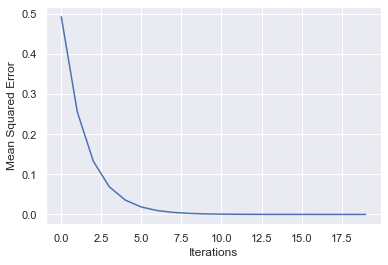

In [48]:
n_updates = 20
mse_hist = []

# Iterate over the number of updates
for i in range(n_updates):
    # Calculate the slope: slope
    slope = get_slope(input_data, target, weights)
    
    # Update the weights: weights
    weights = weights - 0.01 * slope
    
    # Calculate mse with new weights: mse
    mse = get_mse(input_data, target, weights)
    
    # Append the mse to mse_hist
    mse_hist.append(mse)

# Plot the mse history
plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()

# Backpropagation